### Covid Prediction Data with RNN

In [575]:
from Model import Model
from preprocessing import Preprocessing

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import math


matplotlib.use('Agg')
%matplotlib inline
np.random.seed(11)

In [576]:
preprocessing = Preprocessing()

In [614]:
df = preprocessing.load_excel('data/data.xlsx')

In [615]:
df

,Date,Confirm,Recovery,Mortality
0,2020-03-19,1,0,1
1,2020-03-20,0,0,0
2,2020-03-21,0,0,0
3,2020-03-22,0,0,0
4,2020-03-23,0,0,0
...,...,...,...,...
192,2020-09-27,70,52,4
193,2020-09-28,27,118,0
194,2020-09-29,33,228,0
195,2020-09-30,44,43,1


In [616]:
df['Date'] = pd.to_datetime(df.Date)

In [617]:
df.sort_values(by='Date', ascending=True)


,Date,Confirm,Recovery,Mortality
0,2020-03-19,1,0,1
1,2020-03-20,0,0,0
2,2020-03-21,0,0,0
3,2020-03-22,0,0,0
4,2020-03-23,0,0,0
...,...,...,...,...
192,2020-09-27,70,52,4
193,2020-09-28,27,118,0
194,2020-09-29,33,228,0
195,2020-09-30,44,43,1


In [618]:
group_ = df.groupby(['Confirm','Recovery','Mortality']).agg('sum')
group_

Empty DataFrame
Columns: []
Index: [(0, 0, 0), (0, 2, 1), (0, 3, 0), (1, 0, 0), (1, 0, 1), (1, 4, 0), (1, 5, 0), (2, 0, 0), (2, 9, 1), (3, 0, 0), (3, 0, 1), (3, 0, 3), (3, 7, 1), (3, 33, 0), (4, 0, 0), (4, 12, 0), (5, 0, 1), (5, 0, 2), (5, 6, 0), (5, 20, 0), (6, 25, 0), (7, 0, 0), (7, 5, 0), (8, 0, 1), (8, 4, 2), (8, 5, 0), (8, 5, 1), (9, 0, 1), (10, 1, 2), (10, 2, 0), (10, 6, 0), (10, 16, 0), (11, 1, 0), (11, 31, 2), (12, 0, 0), (12, 3, 1), (12, 10, 0), (12, 14, 1), (13, 0, 2), (14, 0, 0), (14, 0, 3), (14, 1, 2), (14, 9, 0), (15, 51, 0), (15, 54, 2), (15, 62, 0), (15, 77, 0), (16, 7, 3), (16, 44, 3), (17, 0, 0), (17, 2, 2), (17, 20, 2), (17, 32, 1), (17, 45, 1), (17, 48, 3), (19, 3, 0), (19, 7, 1), (19, 11, 1), (19, 16, 1), (20, 29, 0), (21, 0, 2), (21, 1, 4), (21, 13, 1), (21, 61, 1), (22, 10, 2), (22, 25, 0), (23, 21, 0), (23, 65, 0), (24, 5, 3), (25, 45, 2), (26, 4, 1), (26, 10, 3), (26, 18, 2), (26, 21, 0), (27, 4, 1), (27, 6, 2), (27, 118, 0), (28, 4, 0), (28, 9, 4), (28, 14, 3), (29, 15, 0), (30, 20, 0), (31, 0, 2), (31, 0, 3), (31, 62, 2), (32, 42, 3), (32, 58, 1), (33, 37, 0), (33, 228, 0), (38, 41, 1), (38, 54, 0), (40, 12, 4), (40, 25, 0), (40, 38, 2), (40, 42, 0), (42, 0, 2), (42, 14, 0), (43, 3, 8), (43, 38, 0), (43, 49, 0), ...]

[184 rows x 0 columns]

In [619]:
# df = preprocessing.drop_column(df,['Date'])

In [620]:
df = df if df.index.name == 'Date' else df.set_index('Date')

In [621]:
df = df.astype('float32')
N=10
df

,Confirm,Recovery,Mortality
Date,,,
2020-03-19,1.0,0.0,1.0
2020-03-20,0.0,0.0,0.0
2020-03-21,0.0,0.0,0.0
2020-03-22,0.0,0.0,0.0
2020-03-23,0.0,0.0,0.0
...,...,...,...
2020-09-27,70.0,52.0,4.0
2020-09-28,27.0,118.0,0.0
2020-09-29,33.0,228.0,0.0


In [622]:
def get_data_forecast(data,N):
    X = data.iloc[-N:,[0,1,2]]
    return X

In [623]:
df['pred'] = df.Confirm.shift(-1)

In [624]:
df_new = df.dropna()
df_new

,Confirm,Recovery,Mortality,pred
Date,,,,
2020-03-19,1.0,0.0,1.0,0.0
2020-03-20,0.0,0.0,0.0,0.0
2020-03-21,0.0,0.0,0.0,0.0
2020-03-22,0.0,0.0,0.0,0.0
2020-03-23,0.0,0.0,0.0,1.0
...,...,...,...,...
2020-09-26,38.0,54.0,0.0,70.0
2020-09-27,70.0,52.0,4.0,27.0
2020-09-28,27.0,118.0,0.0,33.0


In [625]:
forecast_pred = get_data_forecast(df,N)
forecast_pred['pred'] = df.Confirm.shift(-N)
forecast_pred

,Confirm,Recovery,Mortality,pred
Date,,,,
2020-09-22,32.0,42.0,3.0,NaN
2020-09-23,43.0,49.0,0.0,NaN
2020-09-24,67.0,113.0,3.0,NaN
2020-09-25,101.0,80.0,0.0,NaN
2020-09-26,38.0,54.0,0.0,NaN
2020-09-27,70.0,52.0,4.0,NaN
2020-09-28,27.0,118.0,0.0,NaN
2020-09-29,33.0,228.0,0.0,NaN
2020-09-30,44.0,43.0,1.0,NaN


In [626]:
# def train_test_plit_data(data):
#     X = data.iloc[:,[1,2]].values
#     y = data.iloc[:,].values
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
#     return X_train, X_test, y_train, y_test
forecast_pred.fillna(0,inplace=True)
forecast_pred

,Confirm,Recovery,Mortality,pred
Date,,,,
2020-09-22,32.0,42.0,3.0,0.0
2020-09-23,43.0,49.0,0.0,0.0
2020-09-24,67.0,113.0,3.0,0.0
2020-09-25,101.0,80.0,0.0,0.0
2020-09-26,38.0,54.0,0.0,0.0
2020-09-27,70.0,52.0,4.0,0.0
2020-09-28,27.0,118.0,0.0,0.0
2020-09-29,33.0,228.0,0.0,0.0
2020-09-30,44.0,43.0,1.0,0.0


### Normalizing the data

In [627]:
df_new.describe()

,Confirm,Recovery,Mortality,pred
count,196.000000,196.000000,196.000000,196.000000
mean,42.852039,32.811226,1.418367,43.096939
std,36.987640,46.858646,1.910424,36.867828
min,0.000000,0.000000,0.000000,0.000000
25%,12.750000,2.000000,0.000000,13.750000
50%,32.000000,18.000000,1.000000,32.500000
75%,66.250000,44.250000,2.000000,66.250000
max,161.000000,278.000000,14.000000,161.000000


### ensure all data is float

In [628]:
values = df_new.values
values = values.astype('float32')
len(values)

196

In [629]:
forecast_pred_values = forecast_pred.values
forecast_pred_values = forecast_pred_values.astype('float32')
len(forecast_pred_values)

10

In [630]:
print("Min:",np.min(values))
print("Max:",np.max(values))

Min: 0.0
Max: 278.0


In [631]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
scaled = scaler.fit_transform(values)
scaled = pd.DataFrame(scaled)
scaled.head(5)

,0,1,2,3
0,0.006211,0.0,0.071429,0.000000
1,0.000000,0.0,0.000000,0.000000
2,0.000000,0.0,0.000000,0.000000
3,0.000000,0.0,0.000000,0.000000
4,0.000000,0.0,0.000000,0.006211


In [632]:
scaled_forecast = scaler.fit_transform(forecast_pred_values)
scaled_forecast = pd.DataFrame(scaled_forecast)
scaled_forecast.head(5)

,0,1,2,3
0,0.067568,0.010638,0.75,0.0
1,0.216216,0.047872,0.00,0.0
2,0.540541,0.388298,0.75,0.0
3,1.000000,0.212766,0.00,0.0
4,0.148649,0.074468,0.00,0.0


In [633]:
# time series function (loock_back as a past time)

def ts(new_data,look_back=60,pred_col=1):
    t = new_data.copy()
    t['id'] = range(1,len(t)+1)
    t = t.iloc[:-look_back,:]
    t.set_index('id',inplace=True)
    pred_value = new_data.copy()
    pred_value = pred_value.iloc[look_back:,pred_col]
    pred_value.columns = ['Pred']
    pred_value = pd.DataFrame(pred_value)
    
    pred_value['id'] = range(1,len(pred_value)+1)
    pred_value.set_index('id',inplace=True)
    final_df = pd.concat([t,pred_value],axis=1)
    
    return final_df

In [634]:
arr_df = ts(scaled,30,0)
arr_df.fillna(0,inplace=True)
arr_df

,0,1,2,3,0
id,,,,,
1,0.006211,0.000000,0.071429,0.000000,0.012422
2,0.000000,0.000000,0.000000,0.000000,0.130435
3,0.000000,0.000000,0.000000,0.000000,0.571429
4,0.000000,0.000000,0.000000,0.000000,0.031056
5,0.000000,0.000000,0.000000,0.006211,0.049689
...,...,...,...,...,...
162,0.105590,0.172662,0.214286,0.267081,0.236025
163,0.267081,0.136691,0.000000,0.279503,0.434783
164,0.279503,0.172662,0.000000,0.124224,0.167702


In [635]:
arr_df_forecast = ts(scaled_forecast,1,0)
arr_df_forecast.fillna(0,inplace=True)
arr_df_forecast

,0,1,2,3,0
id,,,,,
1,0.067568,0.010638,0.75,0.0,0.216216
2,0.216216,0.047872,0.00,0.0,0.540541
3,0.540541,0.388298,0.75,0.0,1.000000
4,1.000000,0.212766,0.00,0.0,0.148649
5,0.148649,0.074468,0.00,0.0,0.581081
6,0.581081,0.063830,1.00,0.0,0.000000
7,0.000000,0.414894,0.00,0.0,0.081081
8,0.081081,1.000000,0.00,0.0,0.229730
9,0.229730,0.015957,0.25,0.0,0.297297


In [636]:
arr_df.columns = ['v1(t-60)','v2(t-60)','v3(t-60)','v4(t-60)','v1(t)']
arr_df.head()

,v1(t-60),v2(t-60),v3(t-60),v4(t-60),v1(t)
id,,,,,
1,0.006211,0.0,0.071429,0.000000,0.012422
2,0.000000,0.0,0.000000,0.000000,0.130435
3,0.000000,0.0,0.000000,0.000000,0.571429
4,0.000000,0.0,0.000000,0.000000,0.031056
5,0.000000,0.0,0.000000,0.006211,0.049689


### Split & Convert Data to Right Shape

In [637]:
#split data into train and test sets
values = arr_df.values
train_sample = int(len(values)*0.8)
train = values[:train_sample,:]
test = values[train_sample:,:]

# split into input and outputs
X_train,y_train = train[:,:-1],train[:,-1]
X_test,y_test = test[:,:-1], test[:,-1]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((132, 4), (132,), (34, 4), (34,))

In [638]:
forecast_pred_test = arr_df_forecast.values[:,:-1]
print(forecast_pred_test.shape)

forecast_pred_test = forecast_pred_test.reshape((forecast_pred_test.shape[0],1,forecast_pred_test.shape[1]))
forecast_pred_test

(9, 4)


array([[[0.06756756, 0.0106383 , 0.75      , 0.        ]],

       [[0.2162162 , 0.04787235, 0.        , 0.        ]],

       [[0.5405405 , 0.38829786, 0.75      , 0.        ]],

       [[1.        , 0.21276595, 0.        , 0.        ]],

       [[0.14864862, 0.07446809, 0.        , 0.        ]],

       [[0.5810811 , 0.06382979, 1.        , 0.        ]],

       [[0.        , 0.41489363, 0.        , 0.        ]],

       [[0.08108106, 1.        , 0.        , 0.        ]],

       [[0.22972971, 0.01595744, 0.25      , 0.        ]]], dtype=float32)

In [639]:
#Reshaping the data set to 3D with sample size, lookback time steps, and the input features.
X_train = X_train.reshape((X_train.shape[0],1,X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0],1,X_test.shape[1]))

print(X_train.shape[1],X_train.shape[2])
X_train.shape, y_train.shape, X_test.shape, y_test.shape

1 4


((132, 1, 4), (132,), (34, 1, 4), (34,))

In [640]:
from tensorflow.keras.layers import Dense,SimpleRNN
from tensorflow.keras.models import Sequential
from tensorflow.keras import backend as K
from tensorflow.keras import Input
from tensorflow.keras.layers import concatenate
from tensorflow.keras.optimizers import SGD, Adagrad, RMSprop, Adadelta, Adamax, Adam
from tensorflow.keras.models import model_from_json
from tensorflow.keras.callbacks import EarlyStopping

def model():
    
    model_rnn = Sequential()
        
    model_rnn.add(SimpleRNN(units=30, input_shape=(X_train.shape[1],X_train.shape[2]), activation="relu"))
    model_rnn.add(Dense(1, activation='relu'))
    model_rnn.add(Dense(1))
    
    model_rnn.compile(loss='mean_squared_error', optimizer=Adam(lr=0.001))
    model_rnn.summary()
    return model_rnn

In [641]:
model_rnn = model()

Model: "sequential_60"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_56 (SimpleRNN)    (None, 30)                1050      
_________________________________________________________________
dense_117 (Dense)            (None, 1)                 31        
_________________________________________________________________
dense_118 (Dense)            (None, 1)                 2         
Total params: 1,083
Trainable params: 1,083
Non-trainable params: 0
_________________________________________________________________


In [642]:
history_rnn = model_rnn.fit(X_train, y_train,
                         epochs = 100, batch_size=32,
                         validation_data=(X_test,y_test),
                         verbose=1, callbacks=[EarlyStopping(monitor='val_loss', patience=10)],shuffle=False
                         )

Epoch 1/100
5/5 [==============================] - 0s 24ms/step - loss: 0.0810 - val_loss: 0.0548
Epoch 2/100
5/5 [==============================] - 0s 7ms/step - loss: 0.0766 - val_loss: 0.0525
Epoch 3/100
5/5 [==============================] - 0s 7ms/step - loss: 0.0738 - val_loss: 0.0506
Epoch 4/100
5/5 [==============================] - 0s 6ms/step - loss: 0.0716 - val_loss: 0.0492
Epoch 5/100
5/5 [==============================] - 0s 7ms/step - loss: 0.0697 - val_loss: 0.0479
Epoch 6/100
5/5 [==============================] - 0s 7ms/step - loss: 0.0679 - val_loss: 0.0467
Epoch 7/100
5/5 [==============================] - 0s 7ms/step - loss: 0.0663 - val_loss: 0.0457
Epoch 8/100
5/5 [==============================] - 0s 7ms/step - loss: 0.0649 - val_loss: 0.0448
Epoch 9/100
5/5 [==============================] - 0s 8ms/step - loss: 0.0635 - val_loss: 0.0440
Epoch 10/100
5/5 [==============================] - 0s 7ms/step - loss: 0.0621 - val_loss: 0.0433
Epoch 11/100
5/5 [==========

In [643]:
def save_history(history,model):
            
    # save history
    loss_history = history.history["loss"]
    testing_loss_history = history.history["val_loss"]

    loss = np.array(loss_history)
    np.savetxt("static/loss_history.txt", loss, delimiter=",")

    tes_loss = np.array(testing_loss_history)
    np.savetxt("static/testing_loss_history.txt", tes_loss, delimiter=",")

    model_json = model.to_json()
    with open("model.json", "w") as json_file:
        json_file.write(model_json)

    model.save_weights('model.h5')
    
    return 'loss history dan model saved!'

In [644]:
save_history(history_rnn,model_rnn)

'loss history dan model saved!'

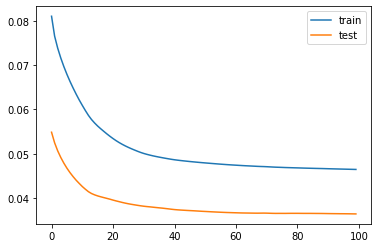

In [645]:
plt.plot(history_rnn.history['loss'],label='train')
plt.plot(history_rnn.history['val_loss'],label='test')
plt.legend()
plt.show()

In [646]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
# make prediction
yhat = model_rnn.predict(X_test)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[2])

# invert scaling for forecast
inv_yhat = concatenate((yhat,X_test[:,1:]),axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

# invert scaling for actual
y_test = y_test.reshape((len(y_test),1))
inv_y = concatenate((y_test,X_test[:,1:]),axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

print('Mean absolute error (MAE): %f'% mean_absolute_error(inv_y,inv_yhat))
print('Mean squared error (MSE): %f'% mean_squared_error(inv_y,inv_yhat))
print('Root mean squared error (RMAE): %f'% math.sqrt(mean_squared_error(inv_y,inv_yhat)))
print('R squared (R^2): %f'% r2_score(inv_y,inv_yhat))


Mean absolute error (MAE): 10.907745
Mean squared error (MSE): 199.322949
Root mean squared error (RMAE): 14.118178
R squared (R^2): -0.100019


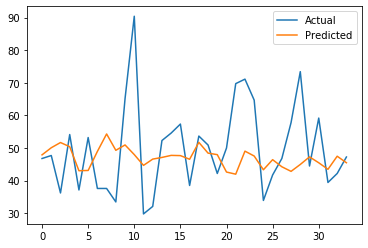

In [647]:
plt.plot(inv_y,label="Actual")
plt.plot(inv_yhat,label="Predicted")
plt.legend()
plt.show()

In [648]:
forecast_pred = forecast_pred_test
forecast_pred = model_rnn.predict(forecast_pred_test)
forecast_pred

array([[0.41005242],
       [0.24948119],
       [0.411235  ],
       [0.30611056],
       [0.23261522],
       [0.5980094 ],
       [0.16622905],
       [0.13169263],
       [0.32732216]], dtype=float32)

In [649]:
forecast_pred_test = forecast_pred_test.reshape(forecast_pred_test.shape[0],forecast_pred_test.shape[2])
forecast_pred = concatenate((forecast_pred,forecast_pred_test[:,1:]),axis=1)
print(forecast_pred)
forecast_pred = scaler.inverse_transform(forecast_pred)
forecast_pred = forecast_pred[:,0]
forecast_pred

tf.Tensor(
[[0.41005242 0.0106383  0.75       0.        ]
 [0.24948119 0.04787235 0.         0.        ]
 [0.411235   0.38829786 0.75       0.        ]
 [0.30611056 0.21276595 0.         0.        ]
 [0.23261522 0.07446809 0.         0.        ]
 [0.5980094  0.06382979 1.         0.        ]
 [0.16622905 0.41489363 0.         0.        ]
 [0.13169263 1.         0.         0.        ]
 [0.32732216 0.01595744 0.25       0.        ]], shape=(9, 4), dtype=float32)


array([57.34387915, 45.46160823, 57.4313905 , 49.65218185, 44.21352658,
       71.25269598, 39.30095062, 36.7452555 , 51.2218398 ])

In [732]:
import calendar
# calendar.monthrange(2012,1)[1]
def plot_data(data,forecast,n):
    
   
    old_data = data['Confirm'][-n*2:]
    new_data = [np.nan for _ in range(len(old_data))]
    
    old_data.index.strftime("%Y-%m-%d")
    list_date = list(old_data.index)
    
    list_date = [str(i).split(' ')[0] for i in list_date]
    last_date = str(list(old_data.index)[-1]).split(' ')[0]
    
    
    last_year = last_date.split('-')[0]
    last_month = last_date.split('-')[1]
    last_day = last_date.split('-')[2]
    
    label_data = [old_data[i] for i in range(len(old_data))]
    for i in range(n):
        new_data.append(forecast[i])
        label_data.append(np.nan)
        
        new_year = int(last_year)
        new_month = int(last_month)
        new_day = int(last_day)+i+1
        
        new_day_limit = calendar.monthrange(new_year,new_month)[1]
        if new_day > new_day_limit:
            new_day -=new_day_limit
            new_month = int(last_month)+1
            
        if new_month > 12:
            new_year += 1
            last_month= int(last_month)-12
            last_year= int(last_year)+1
            new_month -= 12
        list_date.append(str(new_year)+'-'+str('0'+str(new_month) if new_month < 10 else new_month)+'-'
                         +str('0'+str(new_day) if new_day < 10 else new_day))
    new_df = {'date':list_date,'Confirm':label_data,'forecast':new_data}
    
    new_df = pd.DataFrame(data=new_df)
#     print(new_df)
    # initial plot
    plt.figure(figsize=(45, 8))
    plt.plot(new_df['date'], new_df['Confirm'], 'b-', label = 'Confirm')
    plt.plot(new_df['date'], new_df['forecast'], 'r-', label = 'Forecast')
    plt.xlabel('Tanggal');
    plt.ylabel('Jumlah');
    plt.title('Label of Prediction covid-19 '+'Confirmed Status')
    plt.savefig('static/hasilplot/{}-{}.png'.format('Confirmed',n))
    plt.show(); # show plot
    
    return 'Ok'

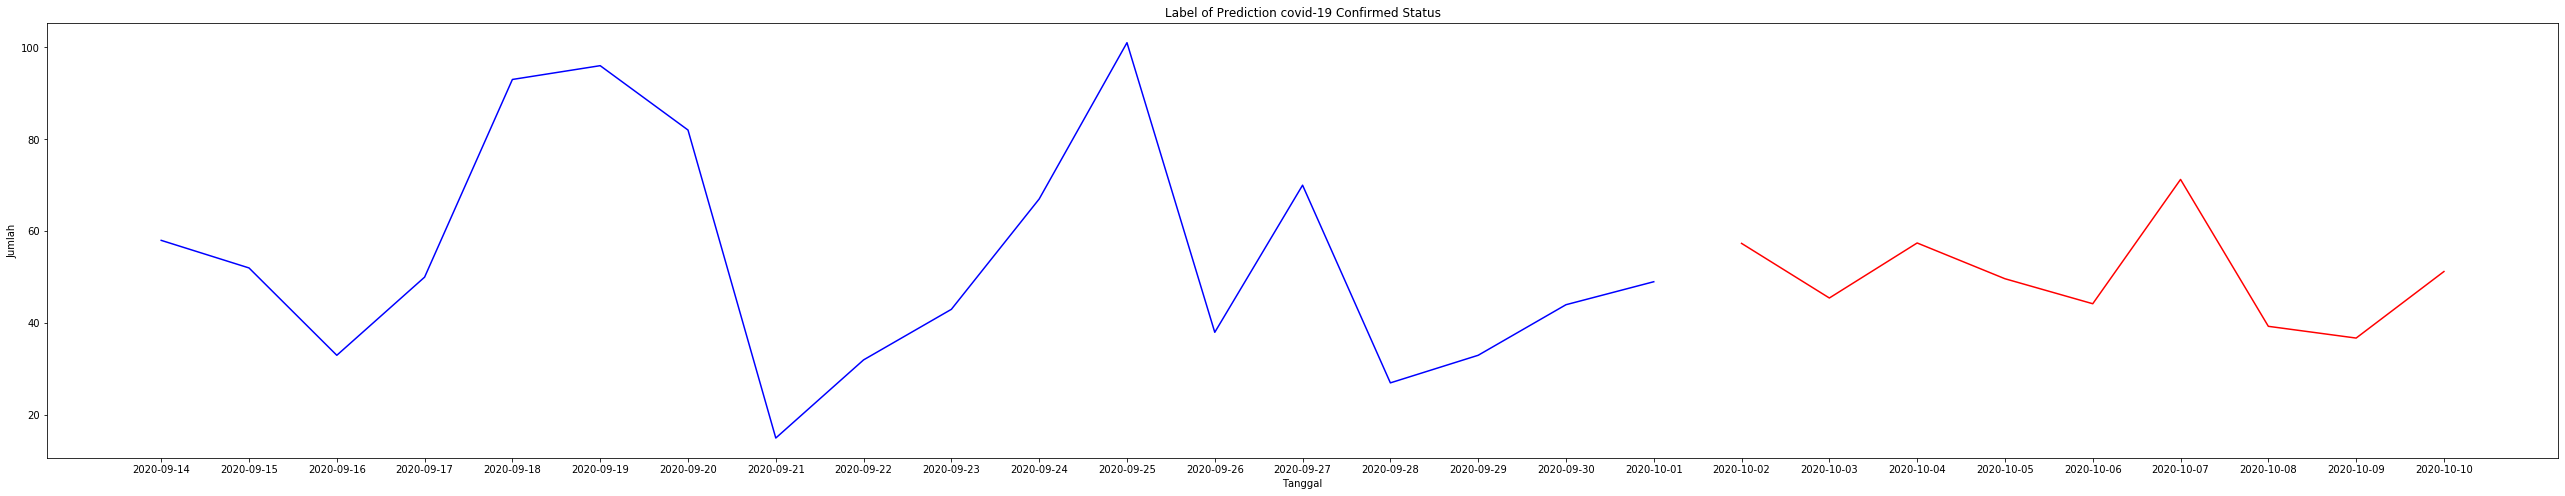

'Ok'

In [733]:
plot_data(df,forecast_pred,9)
